# Temperature trends in Canberra, Australia
### matthew.bitters@colorado.edu
### 10/1/2025

This script downloads NCEI temperature data from the Canberra, Australia 
airport and makes some figures to evaluate trends over time.



## Australia is a special place for me
I completed my PhD work in Australia where I was based out of Canberra
and a tiny town called Bombala in southeastern Australia. The timber industry
is very prevalent in this area. In the 1980s, the state forest service cleared
native Eucalyptus forest and replaced it with a Monterrey pine plantation for
timber harvest. However, they left behind fragments of native forest of 
different sizes and distance to one another. I examined how species at high
trophic levels, e.g., predator ground beetles and nematode parasites, responded
to habitat fragmentation and then wildfire.

![forest_background](02-climate-matthewbitters/IMG_2197[62321].pg)

In [32]:
# Import libraries
import earthpy # Manage local data
import pandas as pd
import hvplot.pandas
import holoviews as hv
import numpy as np
# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

In [7]:
# url for Canberra airport - max temperature
can_url = ('https://www.ncei.noaa.gov/access/services/da'
'ta/v1?dataset=daily-summaries&dataTypes=TMAX&stations=ASN00070014&startDate=1939-03-01&endDate=2010-12-01&units=standard')
can_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TMAX&stations=ASN00070014&startDate=1939-03-01&endDate=2010-12-01&units=standard'

In [8]:
# Download the climate data
can_climate_df = pd.read_csv(
    can_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)

# Check that the download worked
can_climate_df.head()

,STATION,TMAX
DATE,,
1939-03-01,ASN00070014,75.0
1939-03-02,ASN00070014,74.0
1939-03-03,ASN00070014,74.0
1939-03-04,ASN00070014,75.0
1939-03-05,ASN00070014,NaN


In [9]:
# Rename max temp column (TMAX) to max_temp_f (deg f) 
can_climate_df = can_climate_df.rename(columns={
    'TMAX': 'max_temp_f',
})
can_climate_df.head()

,STATION,max_temp_f
DATE,,
1939-03-01,ASN00070014,75.0
1939-03-02,ASN00070014,74.0
1939-03-03,ASN00070014,74.0
1939-03-04,ASN00070014,75.0
1939-03-05,ASN00070014,NaN


In [10]:
# Convert temp_f to temp_c using a function
def convert_temp_f_to_c(max_temp_f):
    """Convert Fahrenheit temperature to Celcius"""
    return (max_temp_f-32) * 5/9

# Use function
can_climate_df['max_temp_c'] = (
    can_climate_df['max_temp_f'].apply(convert_temp_f_to_c))

# Look at df
can_climate_df

,STATION,max_temp_f,max_temp_c
DATE,,,
1939-03-01,ASN00070014,75.0,23.888889
1939-03-02,ASN00070014,74.0,23.333333
1939-03-03,ASN00070014,74.0,23.333333
1939-03-04,ASN00070014,75.0,23.888889
1939-03-05,ASN00070014,NaN,NaN
...,...,...,...
2010-11-27,ASN00070014,82.0,27.777778
2010-11-28,ASN00070014,66.0,18.888889
2010-11-29,ASN00070014,61.0,16.111111


In [11]:
# Save the climate data
can_climate_df.to_csv('canberra_climate_data')

<Axes: title={'center': 'Maximum temperature in Canberra, Australia (1939-2010)'}, xlabel='Year', ylabel='Temperature (degrees Celsius)'>

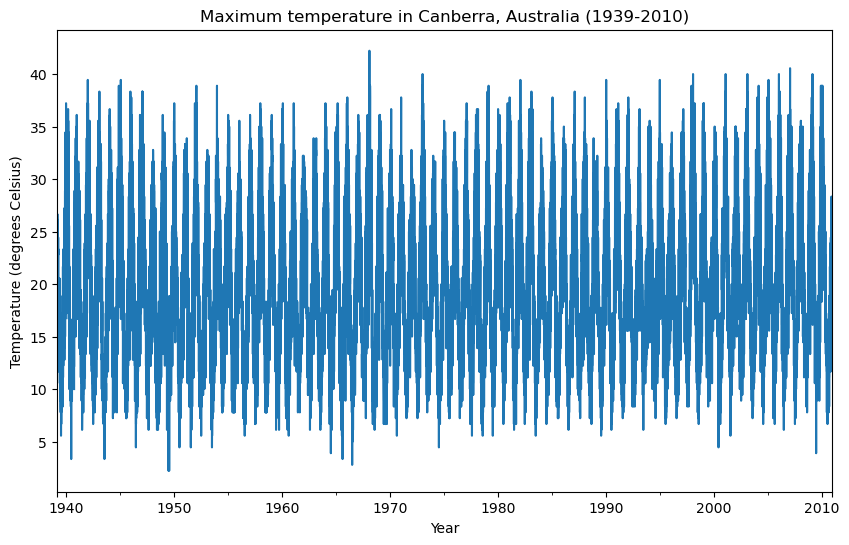

In [14]:
# Make a basic plot
can_climate_df.plot(
    y = 'max_temp_c',
    title = 'Maximum temperature in Canberra, Australia (1939-2010)',
    xlabel = 'Year',
    ylabel = 'Temperature (degrees Celsius)',
    figsize = (10,6),
    legend = False)

In [23]:
print(can_climate_df.columns)

Index(['STATION', 'max_temp_f', 'max_temp_c'], dtype='object')


In [25]:
# Summarize to annual average max temperature 
can_ann_df = (
can_climate_df[['max_temp_f', 'max_temp_c']]
.resample('YS')
.mean()
)


can_ann_df

,max_temp_f,max_temp_c
DATE,,
1939-01-01,63.222951,17.346084
1940-01-01,69.548209,20.860116
1941-01-01,67.443526,19.690848
1942-01-01,67.526027,19.736682
1943-01-01,64.336111,17.964506
...,...,...
2006-01-01,71.126027,21.736682
2007-01-01,70.161644,21.200913
2008-01-01,68.751366,20.417426


<Axes: title={'center': 'Mean annual max temperature in Canberra, Australia (1939-2010)'}, xlabel='Year', ylabel='Temperature (degrees Celsius)'>

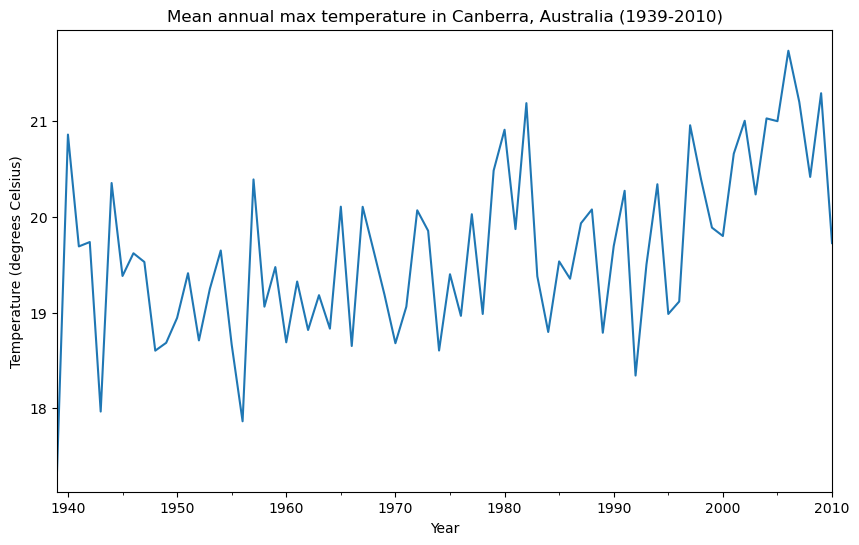

In [27]:
# Plot the annual data
can_ann_df.plot(
    y = 'max_temp_c',
    title = 'Mean annual max temperature in Canberra, Australia (1939-2010)',
    xlabel = 'Year',
    ylabel = 'Temperature (degrees Celsius)',
    figsize = (10,6),
    legend = False)

In [ ]:
# Plot the annual data interactively
inter_canberra_annual_climate_plot = can_ann_df.hvplot(
    y = 'max_temp_c',
    title = 'Mean annual max temperature in Canberra, Australia (1939-2010)',
    xlabel = 'Year',
    ylabel = 'Temperature (°C)',
    figsize = (10,6),
    legend = False)

inter_canberra_annual_climate_plot

:Curve   [DATE]   (max_temp_c)

In [31]:
# Save interactive annual plot
hv.save(inter_canberra_annual_climate_plot, 'inter_canberra_annual_climate_plot.html')

In [41]:
# Fit an OLS linear regression


# Reset index so DATE is a column again
can_ann_df = can_ann_df.reset_index()

# Extract year
can_ann_df["year"] = can_ann_df["DATE"].dt.year

# Drop rows with missing temp values
can_ann_df = can_ann_df.dropna(subset=["max_temp_c"])

# Define predictors (X) and response (y)
X = can_ann_df["year"].values.reshape(-1, 1)   # sklearn needs 2D array
y = can_ann_df["max_temp_c"].values

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Save coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Print coefficients
print("Intercept (β0):", model.intercept_)
print("Slope (β1, °C per year):", model.coef_[0])

Intercept (β0): -23.865992429627404
Slope (β1, °C per year): 0.022028197784429066


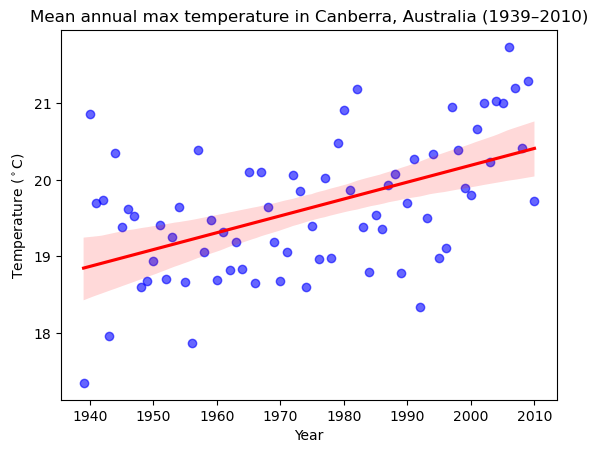

In [ ]:
# Plot annual average max temperature with a trend line and save figure
ax = sns.regplot(
    data=can_ann_df,
    x="year",
    y="max_temp_c",
    scatter_kws={"alpha": 0.6, "color": "blue"},
    line_kws={"color": "red"}
)

ax.set(
    title='Mean annual max temperature in Canberra, Australia (1939–2010)',
    xlabel='Year',
    ylabel='Temperature ($^\circ$C)'
)

# Save the figure via the Axes object
ax.figure.savefig("canberra_annual_max_temp.png", dpi=300, bbox_inches='tight')

plt.show()

In [43]:
# Predict trend values for first and last year
first_year = can_ann_df["year"].min()
last_year = can_ann_df["year"].max()

temp_first = model.predict([[first_year]])[0]
temp_last = model.predict([[last_year]])[0]

# Difference over the period
temp_change = temp_last - temp_first

print(f"Predicted temperature in {first_year}: {temp_first:.2f}°C")
print(f"Predicted temperature in {last_year}: {temp_last:.2f}°C")
print(f"Change over the period: {temp_change:.2f}°C")

# Predict temperature in 2050
year_2050 = 2050
temp_2050 = model.predict([[year_2050]])[0]

print(f"Predicted temperature in {year_2050}: {temp_2050:.2f}°F")

Predicted temperature in 1939: 18.85°C
Predicted temperature in 2010: 20.41°C
Change over the period: 1.56°C
Predicted temperature in 2050: 21.29°F
